# **Topic 7 – Dimensionality Reduction**

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1bPn_DOTALUoQ24NwR411ZQjxgJR-rDFF#scrollTo=-yUvtsiq5nmJ)

# Setup

As we did in previous topics, let's define the default font sizes to make the figures prettier:

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

And let's create the `images/dim_reduction` folder (if it doesn't already exist), and define the `save_fig()` function which is used through this notebook to save the figures in high-res for the book:

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "dim_reduction"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# PCA

Let's generate a small 3D dataset. It's an oval shape, rotated in 3D space, with points distributed unevenly, and with quite a lot of noise:

In [4]:
# Data generation

import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(1812)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # shift a bit

In [5]:
X

array([[-5.73786441e-01, -5.16623439e-01,  2.08278649e-01],
       [-2.22854585e-01, -8.09344243e-01, -1.64462984e-01],
       [ 9.47327200e-01,  6.02683854e-01,  1.03894528e-01],
       [ 5.73383614e-01,  1.29868585e+00,  5.74304581e-01],
       [ 1.55866861e-02, -6.83536734e-01, -3.30688759e-01],
       [-3.46465340e-01, -1.40161084e+00, -2.11658684e-01],
       [ 2.01885119e-01, -3.58896329e-01, -3.32090296e-01],
       [ 6.19523223e-01,  7.76822933e-02,  1.92095782e-01],
       [-6.23504261e-01, -6.73123454e-01,  3.32640610e-01],
       [-5.40586100e-01, -4.75224187e-02,  1.09313642e-01],
       [ 4.80083428e-01,  4.58611831e-01,  2.69029627e-01],
       [-7.87037720e-01, -8.14590272e-01,  1.18063567e-01],
       [-6.20838075e-01, -9.70772368e-01, -1.86294921e-01],
       [ 4.77506514e-01,  5.93859591e-01,  3.42550218e-01],
       [ 1.23248084e+00,  1.14423822e+00,  1.12741276e+00],
       [-7.58426239e-02, -7.78209413e-01,  1.55012831e-01],
       [-3.61417514e-01, -6.49636566e-01

## Principal Components

With Scikit-Learn, PCA is really trivial. It even takes care of mean centering for you:

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [7]:
pca.components_

array([[ 0.58511015,  0.77656891,  0.23363826],
       [ 0.80172675, -0.59726292, -0.02261032]])

## Explained Variance Ratio

Now let's look at the explained variance ratio:

In [8]:
pca.explained_variance_ratio_

array([0.80143834, 0.11759627])

The first dimension explains about 80% of the variance, while the second explains about 12%.

By projecting down to 2D, we lost about 8% of the variance:

In [9]:
1 - pca.explained_variance_ratio_.sum() 

0.0809653889876405

## Choosing the Right Number of Dimensions

Instead of choosing the number of dimensions to reduce down to, it is possible to choose the proportion of variance aiming to capture. The algorithm will select the number of components that gathers it.

In [10]:
# Let's download the MNIST data and split them
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

In [11]:
# Now we look for the number of components that gather at least 95% of the variance
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [12]:
pca.n_components_

154

In [13]:
pca.explained_variance_ratio_.sum()  # extra code

0.9501960192613033

To create a plot on how the variance is accumulated as the number of PC increase, we need to train again the PCA with all the components. Then we plot the values, as well as the one at 95% (we call it d)

In [17]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1  # d equals 154

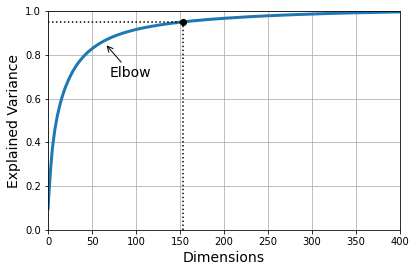

In [18]:
# Plotting cumulative explained variance 

plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"))
plt.grid(True)
save_fig("explained_variance_plot")
plt.show()

## PCA for Compression

In [ ]:
pca = PCA(0.95)
X_reduced = pca.fit_transform(X_train, y_train)

In [ ]:
X_recovered = pca.inverse_transform(X_reduced)

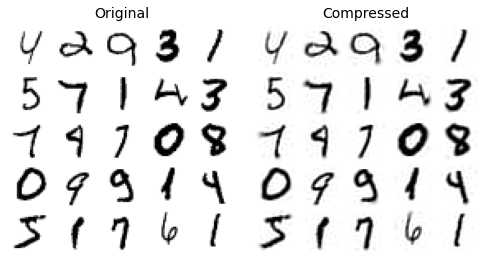

In [ ]:
plt.figure(figsize=(7, 4))
for idx, X in enumerate((X_train[::2100], X_recovered[::2100])):
    plt.subplot(1, 2, idx + 1)
    plt.title(["Original", "Compressed"][idx])
    for row in range(5):
        for col in range(5):
            plt.imshow(X[row * 5 + col].reshape(28, 28), cmap="binary",
                       vmin=0, vmax=255, extent=(row, row + 1, col, col + 1))
            plt.axis([0, 5, 0, 5])
            plt.axis("off")

save_fig("mnist_compression_plot")